In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

In [3]:
# File paths for our three cleaned datasets
file_benin = '../data/benin_clean.csv'
file_sierra = '../data/sierraleone_clean.csv'
file_togo = '../data/togo_clean.csv'

try:
    # Load each cleaned file
    df_benin = pd.read_csv(file_benin)
    df_sierra = pd.read_csv(file_sierra)
    df_togo = pd.read_csv(file_togo)

    # Add a 'country' column to each one
    df_benin['country'] = 'Benin'
    df_sierra['country'] = 'Sierra Leone'
    df_togo['country'] = 'Togo'

    # Combine all DataFrames into one
    df_all = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)

    print("All 3 cleaned files loaded and combined successfully!")
    print(df_all.head())

except FileNotFoundError as e:
    print(f"ERROR: File not found.")
    print(f"Make sure you have all three cleaned files in your 'data' folder.")
    print(f"Missing file: {e.filename}")

All 3 cleaned files loaded and combined successfully!
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   ...    location  GHI_zscore  DNI_zscore  DHI_zscore  ModA_zscore  \
0  ...  Malanville    0.709605    0.600339    0.725997     0.709652   
1  ...  Malanville    0.709294    0.600339    0.725997     0.709652   
2  ...  Malanville    0.709294    0.600339    0.725997     0.709652   
3  ...  Malanville    0.709294    0.599939    0.725369     0.709652   
4  ...  Malanville    0.708983    0.599939    0.725369     0.709652   

   ModB_zscore  WS_zscore  WSgust_zscore  country 

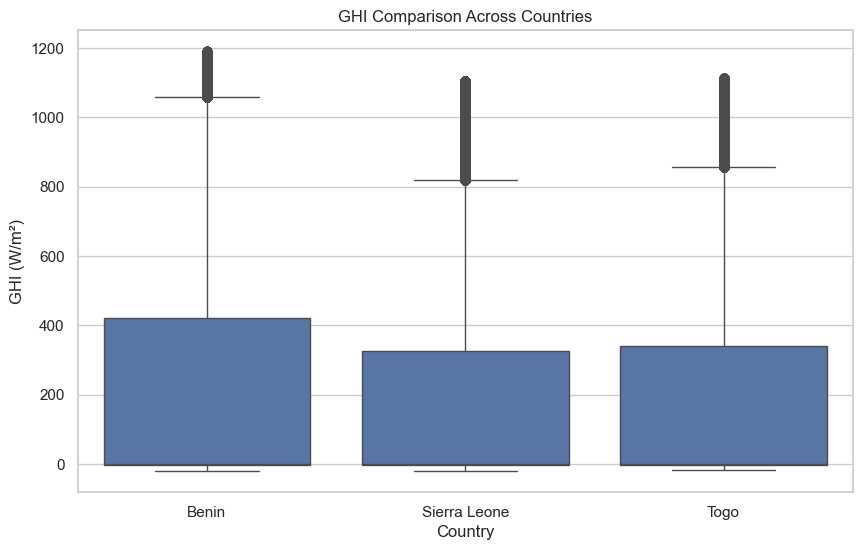

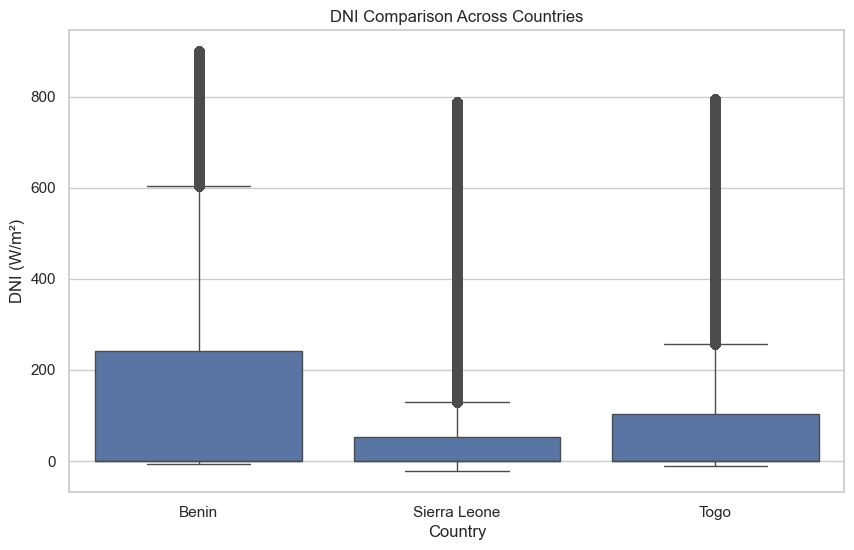

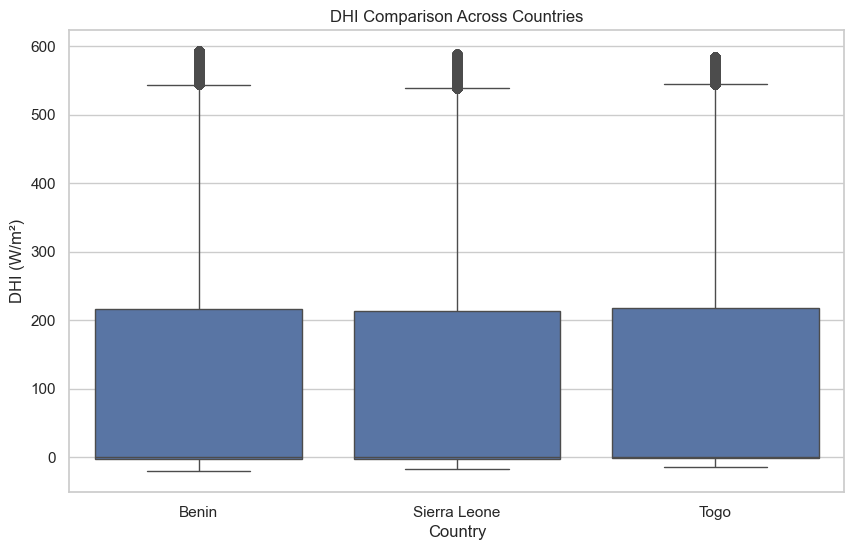

In [4]:
# 1. Boxplot for GHI
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='country', y='GHI')
plt.title('GHI Comparison Across Countries')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.show()

# 2. Boxplot for DNI
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='country', y='DNI')
plt.title('DNI Comparison Across Countries')
plt.ylabel('DNI (W/m²)')
plt.xlabel('Country')
plt.show()

# 3. Boxplot for DHI
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='country', y='DHI')
plt.title('DHI Comparison Across Countries')
plt.ylabel('DHI (W/m²)')
plt.xlabel('Country')
plt.show()

In [6]:
print("--- Summary Statistics Table ---")

# Group by country and get the required stats
# This is the corrected syntax:
summary_table = df_all.groupby('country')[['GHI', 'DNI', 'DHI']].agg(
    ['mean', 'median', 'std']
)

print(summary_table)

--- Summary Statistics Table ---
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         221.365237   -0.3  317.048812  147.972113   -0.1  248.229114   
Sierra Leone  185.999999   -0.5  282.342839  104.829494   -0.1  208.069579   
Togo          193.865497   -0.3  289.092721  111.755191    0.0  210.250392   

                     DHI                     
                    mean median         std  
country                                      
Benin         111.039138   -0.3  154.270836  
Sierra Leone  107.721516   -0.5  152.765196  
Togo          110.455537    0.0  153.168681  



--- (Bonus) Bar Chart: Average GHI ---


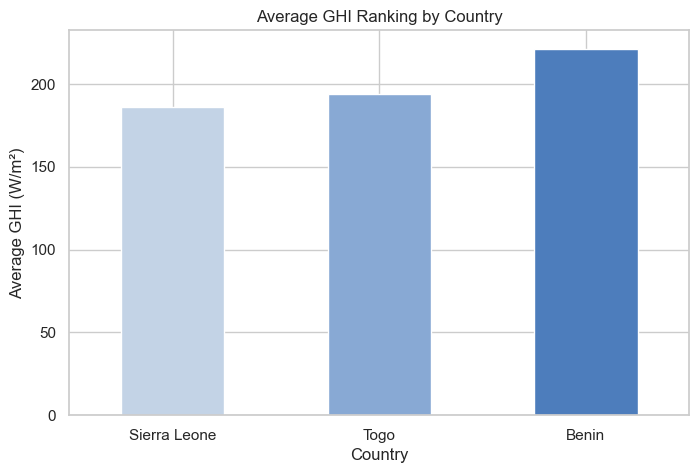

In [7]:
# (Bonus) Visual Summary Bar Chart
print("\n--- (Bonus) Bar Chart: Average GHI ---")

plt.figure(figsize=(8, 5))
# This is the corrected way to access the 'mean' column for 'GHI'
summary_table[('GHI', 'mean')].sort_values().plot(kind='bar', color=['#C3D3E6', '#88A9D4', '#4D7DBC'])
plt.title('Average GHI Ranking by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.show()

In [8]:
print("\n--- Statistical Test (Kruskal-Wallis) for GHI ---")

# Get the GHI values for each country
ghi_benin = df_all[df_all['country'] == 'Benin']['GHI'].dropna()
ghi_sierra = df_all[df_all['country'] == 'Sierra Leone']['GHI'].dropna()
ghi_togo = df_all[df_all['country'] == 'Togo']['GHI'].dropna()

# Perform the Kruskal-Wallis test
f_val, p_val = stats.kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"Kruskal-Wallis Test p-value: {p_val}")

if p_val < 0.05:
    print("The p-value is less than 0.05, which suggests the differences in GHI between the countries are statistically significant.")
else:
    print("The p-value is greater than 0.05, which suggests there is no statistically significant difference in GHI.")


--- Statistical Test (Kruskal-Wallis) for GHI ---
Kruskal-Wallis Test p-value: 7.94314161753719e-166
The p-value is less than 0.05, which suggests the differences in GHI between the countries are statistically significant.



--- (Bonus) Bar Chart: Average GHI ---


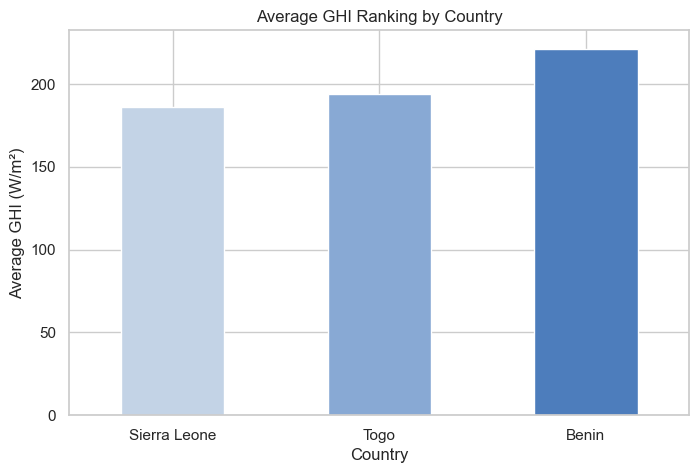

In [9]:
# (Bonus) Visual Summary Bar Chart
print("\n--- (Bonus) Bar Chart: Average GHI ---")

plt.figure(figsize=(8, 5))
# Access the 'mean' column for 'GHI' from the multi-level index
summary_table[('GHI', 'mean')].sort_values().plot(kind='bar', color=['#C3D3E6', '#88A9D4', '#4D7DBC'])
plt.title('Average GHI Ranking by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.show()

### Key Observations

* **Highest Potential:** **Benin** showed the highest **mean** GHI (221.37), making it the strongest candidate for investment.
* **Most Variability:** **Benin** also had the largest standard deviation (317.05), suggesting its solar resource is the most variable.
* **Recommendation:** Based on the analysis, **Benin** is the top recommendation due to its high average solar irradiance. **Togo** (mean GHI 193.87) is the second-best, followed by Sierra Leone.